# MÉTRICAS DE TARGET BINARIA

## Objetivo de esta lección

Aprender a evaluar la capacidad predictiva de modelos de target binaria.

Si recuerdas del módulo de estadística podíamos clasificar las variables según su escala de medida.

Siendo la primera división categóricas Vs cuantitativas.

Y dentro de categóricas teníamos nominales y ordinales.

Y dentro de nominales teníamos el caso específico de que la variable solo pudiera tener 2 valores, y esa variable se llamaba dicotómica o binaria.

Aunque es posible tener también alguna target ordinal o nominal con más de 2 valores, la realidad es que en el mayoría de los casos de data science en ámbitos empresariales la target será:

* contínua: como la que ya hemos visto
* binaria

Incluso en otras situaciones, de por ejempolo tener una variable a predecir que tiene 5 estados, yo recomiendo hacer 5 modelos binarios en lugar de uno.

Pero la forma de evaluar una target binaria es muy diferente (y más compleja) que la de targets contínuas.

Así que vamos a aprender en este módulo como hacerlo.

## Opciones y paquetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## Importación de datos

Vamos a usar el dataset sintético de target binaria.

In [2]:
#Cargamos el dataset sintetico_binaria.csv que está en 00_DATASETS
df = pd.read_csv('../../00_DATASETS/sintetico_binaria.csv')
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
0,-0.266432,-1.649948,-0.349640,-1.522604,2.566878,1.495543,-2.190401,-0.397880,1.915840,0
1,-0.957055,0.010025,-0.016071,-1.503270,0.450517,0.618956,-0.717107,0.158979,0.334379,1
2,1.749467,-1.314553,-0.448371,-2.182398,-2.015897,-0.914221,-2.577705,1.032420,2.396877,1
3,-1.853083,-1.678272,1.285303,-0.580328,-0.878353,-0.574685,-0.440330,2.617362,-1.206825,0
4,0.983757,-0.528091,2.335109,-0.485462,2.063985,3.615928,-2.418671,1.053133,1.412055,1
...,...,...,...,...,...,...,...,...,...,...
995,0.137035,-0.651149,0.506537,-0.808918,0.121417,0.275886,-0.631953,1.200345,-0.408929,0
996,-0.611333,1.640563,2.731870,-1.303258,-0.074655,2.681244,0.275025,-1.869411,2.484661,0
997,0.999843,-1.650038,1.067600,-0.676316,-2.278678,-1.067705,-1.449736,3.841241,-1.129555,0
998,-0.788198,0.541500,3.307268,-0.394564,-1.839605,2.814642,-3.555806,6.302001,-1.799188,0


## Modelo

Para ejemplificar todas las métricas usaremos un modelo de árbol de decisión.

Todavía no intentes comprender este algoritmo, ya lo veremos en profundidad más adelante.

Simplemente ejecuta el código para que lo calcule y centrate en entender e interiorizar las métricas de evaluación.

In [3]:
from sklearn.tree import DecisionTreeClassifier

x = df.drop(columns='target')
y = df['target']

ac = DecisionTreeClassifier(max_depth=5)

ac.fit(x,y)

pred = ac.predict(x)

pred[:20] #previsualizamos 20 casos

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

## Cómo evaluar una target binaria

Existen dos grandes formas de evaluar una modelo con target binaria:

1. Usando métricas
2. Usando gráficos

### Evaluar usando métricas

#### Matriz de confusión

Es la matriz resultante de cruzar la predicción del modelo con la realidad.

Es la base de muchas de las métricas que veremos más abajo.

**Como hacerlo:**

La obtenemos con la función confusion_matrix del módulo metrics pasándole como parámetros el dato real y el dato predicho.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

In [4]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y, pred)

conf

array([[692,  42],
       [ 90, 176]], dtype=int64)

La matriz recoge el conjunto de aciertos y errores, que llaman:

* tn: verdaderos negativos
* fp: falsos positivos
* fn: falsos negativos
* tp: verdaderos positivos

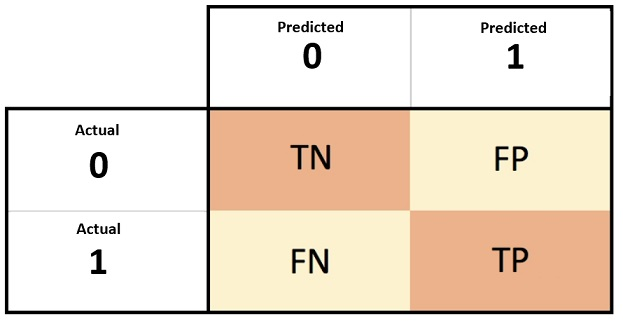

Vamos a extraer esas métricas del array de salida de la matriz de confusión para poder manejarlas

In [5]:
tn, fp, fn, tp = conf.ravel()

total_casos = y.shape[0]
print(tn, fp, fn, tp, total_casos)

692 42 90 176 1000


#### Accuracy

En español se traduce a veces como precisión, pero después veremos que hay otra métrica precision (en inglés). Así que para no liar vamos a usar siempre los nombres en inglés.

Es la métrica más directa e intuitiva, ya que consiste en sumar los aciertos (tn + tp) y dividirlos por el total de casos, teniendo así el porcentaje de veces que el modelo acierta.

Pero la realidad es que esta métrica sólo podríamos usarla en el caso de que las dos clases tuvieran en la target un 50% exacto cada una. Cosa que nunca pasa (salvo que balanceemos).

De momento quédate con que NO tienes que usar esta métrica.

**Cómo hacerlo:**

Si usáramos el módulo metrics le podríamos pedir esta métrica con la función accuracy_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

Si usáramos cross_val_score le podríamos pedir esta métrica con el parámetro scoring = 'accuracy'

In [6]:
#Ej haciéndolo a mano para entenderlo
accuracy = (tn + tp) / total_casos

accuracy

0.868

In [7]:
#Ej usando la función de sklearn
from sklearn.metrics import accuracy_score

accuracy_score(y, pred)

0.868

#### Precision

Esta métrica es el porcentaje de unos predichos por el modelo que realmente son unos en la realidad.

Se calcula como tp / (tp + fp)

**Cómo hacerlo:**

Si usáramos el módulo metrics le podríamos pedir esta métrica con la función precision_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

Si usáramos cross_val_score le podríamos pedir esta métrica con el parámetro scoring = 'precision'

In [8]:
#Ej haciéndolo a mano para entenderlo
precision = tp / (tp + fp)

precision

0.8073394495412844

In [9]:
#Ej usando la función de sklearn
from sklearn.metrics import precision_score

precision_score(y, pred)

0.8073394495412844

#### Recall

Esta métrica es el porcentaje de unos que el modelo es capaz de localizar entre todos los unos reales que existen.

Se calcula como tp / (tp + fn)

**Cómo hacerlo:**

Si usáramos el módulo metrics le podríamos pedir esta métrica con la función recall_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

Si usáramos cross_val_score le podríamos pedir esta métrica con el parámetro scoring = 'recall'

In [10]:
#Ej haciéndolo a mano para entenderlo
recall = tp / (tp + fn)

recall

0.6616541353383458

In [11]:
#Ej usando la función de sklearn
from sklearn.metrics import recall_score

recall_score(y, pred)

0.6616541353383458

#### F1

Las dos métricas anteriores nos dan mucho juego desde negocio.

Pero frecuentemente no querremos tener que manejar 2 métricas, si no que preferimos tener una sola para por ejemplo poder comparar modelos entre sí.

En ese caso podemos usar la F1, que es la media armónica entre precision y recall.

Y se calcula así: F1 = 2 * (precision * recall) / (precision + recall)

**Cómo hacerlo:**

Si usáramos el módulo metrics le podríamos pedir esta métrica con la función f1_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

Si usáramos cross_val_score le podríamos pedir esta métrica con el parámetro scoring = 'f1'

In [12]:
#Ej haciéndolo a mano para entenderlo
F1 = 2 * (precision * recall) / (precision + recall)

F1

0.7272727272727273

In [13]:
#Ej usando la función de sklearn
from sklearn.metrics import f1_score

f1_score(y, pred)

0.7272727272727273

#### Classification report

Como normalmente queremos extraer las 3 métricas anteriores en el mismo análisis Sklearn nos lo pone fácil con la función classification_report del módulo metrics.

**Cómo hacerlo:**

Simplemente llamar a classification_report pasándole el dato real y el dato predicho. Recomendable dentro de un print.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

Si usáramos cross_val_score le podríamos pedir esta métrica con el parámetro scoring = 'classification_report'

In [14]:
#Ej usando la función de sklearn
from sklearn.metrics import classification_report

print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       734
           1       0.81      0.66      0.73       266

    accuracy                           0.87      1000
   macro avg       0.85      0.80      0.82      1000
weighted avg       0.86      0.87      0.86      1000



#### AUC

Todas las métricas anteriores nos dan muy buena información, y sobre todo nos permiten mucho juego desde negocio.

Pero tienen un problema, y es que dependen del umbral de corte del scoring.

Esto es algo más avanzado y que veremos más adelante, pero simplemente para introducirlo diremos que en una situación real no le dejaremos al modelo que nos diga los ceros y unos.

Si no que le pediremos que nos de el scoring y ya seremos nostros los que diremos por encima de qué umbral vamos a decir que es un uno.

De momento sólo quédate con que las métricas que hemos visto hasta ahora dependen del umbral de corte, porque si cambia el umbral cambia la matriz de confusión, y por tanto cambian todas las métricas.

Sin embargo tenemos otra métrica que no depende del umbral de corte (porque realmente los usa todos) y por tanto es mucho más robusta.

Y es la que más se suele utilizar en la realidad: el AUC (Area Under the Curve).

Que no es más que el número equivalente al gráfico ROC que aprenderás en breve.

**Cómo hacerlo:**

Simplemente llamar a roc_auc_score pasándole el dato real y el dato predicho.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

Si usáramos cross_val_score le podríamos pedir esta métrica con el parámetro scoring = 'roc_auc_score'

**Cómo evaluarlo:**

* Menor o igual a 0.7: modelo muy malo o no útil
* Mayor que 0.7: modelo útil
* Mayor que 0.8: modelo bueno

In [15]:
#Ej usando la función de sklearn
from sklearn.metrics import roc_auc_score

roc_auc_score(y, pred)

0.8022167134457397

### Evaluar usando gráficos

Hay dos gráficos que recomiendo usar en contextos empresariales:

* Gain chart: para presentar resultados a usuarios de negocio
* Curva ROC: para presentar resultados a usuario técnicos

Pero antes de aprender como se hacen necesitamos modificar nuestro modelo, ya que estos gráficos van a requerir que usemos el scoring y no la decisión del modelo.

Además también vamos a aprender a hacer otra de las prácticas comunes, que es comparar varios modelos en un mismo gráfico.

Por ello antes de seguir tenemos que:

* Volver a entrenar nuestro árbol pero pidiéndole que nos devuelva el scoring en lugar de la decisión
* Entrenar otro modelo para comparar, por ejemplo una regresión logística

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Entrenamos y predecimos con el árbol

ac = DecisionTreeClassifier(max_depth=5)

ac.fit(x,y)

ac_sco = ac.predict_proba(x)

#Entrenamos y predecimos la regresión logística

rl = LogisticRegression()

rl.fit(x,np.ravel(y))#El ravel es para pasarlo en formato plano y que no salga warning

rl_sco = rl.predict_proba(x)

Veamos una muestra de lo que nos ha creado.

In [17]:
print(ac_sco[:5])
print(rl_sco[:5])

[[0.81538462 0.18461538]
 [0.81538462 0.18461538]
 [0.         1.        ]
 [0.93240093 0.06759907]
 [0.93240093 0.06759907]]
[[0.79197056 0.20802944]
 [0.74680368 0.25319632]
 [0.6794403  0.3205597 ]
 [0.8846773  0.1153227 ]
 [0.9461128  0.0538872 ]]


Ahora que ya tenemos los scoring vamos a ver cómo crear los gráficos

#### Cómo visualizar la matriz de confusión

Realmente esto no nos aporta info nueva, pero nos la muestra de forma más visual para incluir en informes o presentaciones.

Usaremos plot_confusion_matrix del módulo metrics:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix

Tiene una serie de parámetros para personalizar los colores o ponerla en porcentajes que ya conocemos y puedes consultarlos en la documentación.

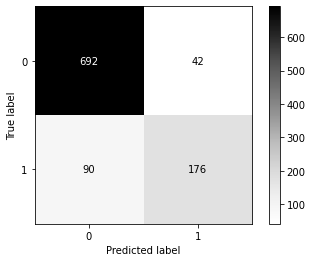

In [18]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(ac,x,y,cmap = 'Greys');

#### Cómo crear un Gain Chart

También llamado gráfico de ganancias.

Posiciona el total de los clientes ordenados según el scoring (en el eje x) contra el acumulado del evento que estemos modelizando (en el eje y).

Y se lee de forma "con el xx% de los clientes somos capaces de capturar el xx% del evento".

Además de la lectura general de "cuanto más alta sea la curva mejor es el modelo".

Dado que tanto los ejes como la interpretación son bastante entendibles es el gráfico recomendado para explicar el modelo a usuarios de negocio.

**Cómo hacerlo:**

Vamos a usar el paquete scikitplot en este caso con la función plot_cumulative_gain().

Puedes instalarlo con:

conda install -c conda-forge scikit-plot

y cargarlo con:

import scikitplot as skplt

Puedes ver todas las funciones y parámetros en:

https://scikit-plot.readthedocs.io/en/stable/metrics.html

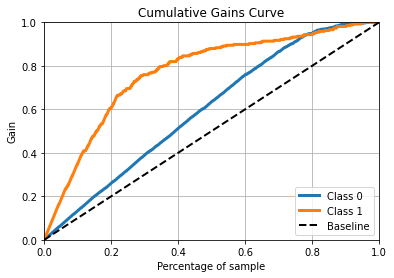

In [19]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y, ac_sco);

Pero vemos que nos muestra tanto la curva de los unos como la de los ceros, que no la queremos y confunde.

Así que vamos a hacer un poco de Matplotlib para quedarnos sólo con la de los unos.

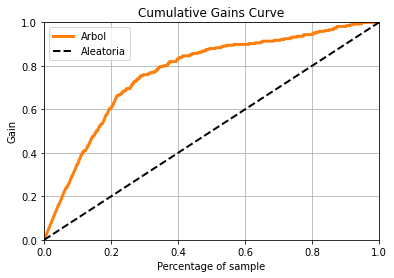

In [20]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(y, ac_sco, ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Arbol','Aleatoria']);

#### Comparar varios modelos en el mismo Gain Chart

Simplemente hay que especificar en cada gráfico que el ax es ax para que los superponga sobre el mismo.

Y luego personalizar la leyenda.

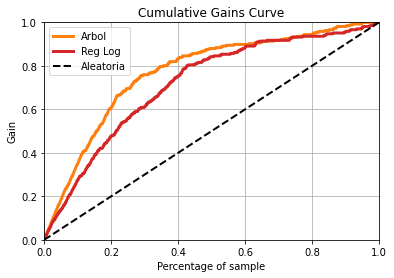

In [21]:
import scikitplot as skplt

fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(y, ac_sco, ax=ax) 

skplt.metrics.plot_cumulative_gain(y, rl_sco, ax=ax)

# #Eliminamos las líneas de los ceros y personalizamos la leyenda
del ax.lines[0]                 
del ax.lines[1]  
del ax.lines[1] 

plt.legend(labels = ['Arbol','Reg Log','Aleatoria']);

#### Cómo crear un Lift Chart

También llamado gráfico de elevación.

En realidad es la misma información que en el Gain chart pero ahora lo que hace es dividir la línea del modelo sobre la línea aleatoria.

De tal forma que para un punto dado se lee como "el modeo es x veces mejor que la línea aleatoria".

**Cómo hacerlo:**

Vamos a usar el paquete scikitplot en este caso con la función plot_lift_curve()

Puedes ver todas las funciones y parámetros en:

https://scikit-plot.readthedocs.io/en/stable/metrics.html

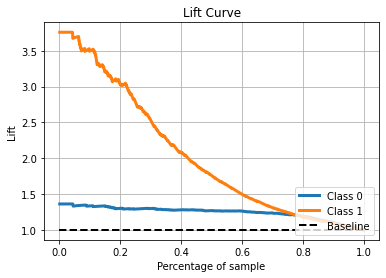

In [22]:
import scikitplot as skplt

skplt.metrics.plot_lift_curve(y, ac_sco);

Pero vemos que nos muestra tanto la curva de los unos como la de los ceros, que no la queremos y confunde.

Así que vamos a hacer un poco de Matplotlib para quedarnos sólo con la de los unos.

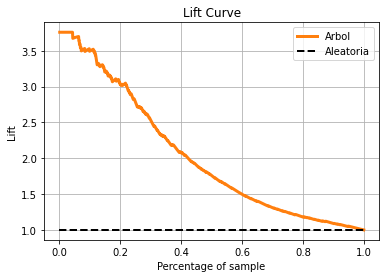

In [23]:
import scikitplot as skplt

fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(y, ac_sco, ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Arbol','Aleatoria']);

#### Comparar varios modelos en el mismo Lift Chart

Simplemente hay que especificar en cada gráfico que el ax es ax para que los superponga sobre el mismo.

Y luego personalizar la leyenda.

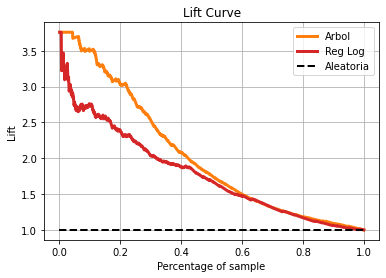

In [27]:
import scikitplot as skplt

fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(y, ac_sco, ax=ax) 

skplt.metrics.plot_lift_curve(y, rl_sco, ax=ax)

# #Eliminamos las líneas de los ceros y personalizamos la leyenda
del ax.lines[0]                 
del ax.lines[1]  
del ax.lines[1]             

plt.legend(labels = ['Arbol','Reg Log','Aleatoria']);

#### Cómo crear una curva ROC (con scikitplot)

Este es el gráfico más robusto para evaluar la capacidad predictiva de un modelo.

Por tanto es el que más se usa en contextos técnicos.

Es un poco más complejo de interpretar que los anteriores ya que los ejes no son tan fácilmente entendibles. 

El eje X es la tasa de falsos positivos FPR = FP / Total ceros reales.

El eje Y es la tasa de verdaderos positivos TPR = TP / Total unos reales.

Pero de nuevo la interpretación fácil es "cuanto más alta salga la curva del modelo mejor".

Lo cual es especialmente útil para comparar distintos modelos entre sí.

El área que queda por debajo de esa curva es exactamente lo que teníamos cuando usábamos el indicador AUC.


**Cómo hacerlo:**

Si queires continuar con scikitplot puedes usar la función plot_roc()

Aunque SkLearn ya ha implantado su propio gráfico, que es más sencillo, y te enseño a hacerlo en la lección posterior a esta.

Puedes ver todas las funciones y parámetros de scikitplot en:

https://scikit-plot.readthedocs.io/en/stable/metrics.html

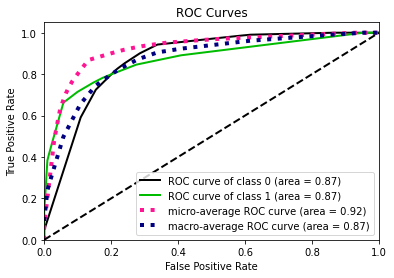

In [26]:
import scikitplot as skplt

skplt.metrics.plot_roc(y, ac_sco);

Pero vemos que nos muestra tanto la curva del modelo como otras que noqueremos y confunden.

Así que vamos a hacer un poco de Matplotlib para quedarnos sólo con la del modelo (y la aleatoria)

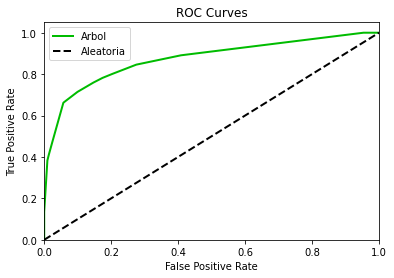

In [27]:
import scikitplot as skplt

fig, ax = plt.subplots()

skplt.metrics.plot_roc(y, ac_sco, ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
del ax.lines[1] 
del ax.lines[1]
plt.legend(labels = ['Arbol','Aleatoria']);

#### Comparar varios modelos en el mismo ROC Chart (con scikitplot)

Simplemente hay que especificar en cada gráfico que el ax es ax para que los superponga sobre el mismo.

Y luego personalizar la leyenda.

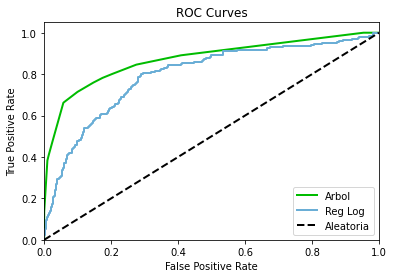

In [28]:
import scikitplot as skplt

fig, ax = plt.subplots()

skplt.metrics.plot_roc(y, ac_sco, ax=ax) 

skplt.metrics.plot_roc(y, rl_sco, ax=ax, cmap = 'Blues')

# #Eliminamos las líneas de los ceros y personalizamos la leyenda
del ax.lines[0]                 
del ax.lines[1] 
del ax.lines[1]
del ax.lines[1]                 
del ax.lines[1] 
del ax.lines[2]
del ax.lines[2]

plt.legend(labels = ['Arbol','Reg Log','Aleatoria']);

#### Como crear una curva ROC (con Sklearn)

Como te decía antes Sklearn ya tiene su propia clase para plotear una ROC: plot_roc_curve()

Para hacerlo no hay ni que precalcular la predicción, simplemente le pasamos el modelo, las predictoras y la target.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve

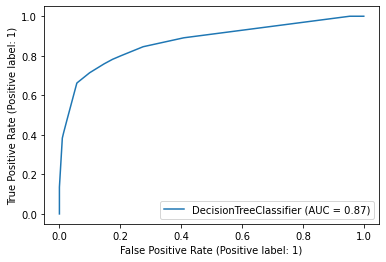

In [29]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(ac,x,y);

#### Comparar varios modelos en el mismo ROC Chart (con Sklearn)

Simplemente hay que especificar en cada gráfico que el ax es ax para que los superponga sobre el mismo.

Y luego personalizar la leyenda.

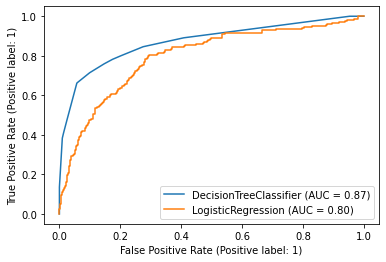

In [30]:
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()

plot_roc_curve(ac,x,y,ax=ax)
plot_roc_curve(rl,x,y,ax=ax);

#### TECNICA PRO: Cómo crear un gráfico de precision-recall

Más adelante aprendreremos cómo sacarle mucho partido a precision-recall desde el punto de vista de negocio.

Te enseñaré un enfoque que pocos data scientist controlan y que es muy potente para optimizar los proyectos en la vida real.

Donde usaremos este gráfico, pero de momento simplemente aprender cómo se hace y lo revisitaremos en el futuro.

Para hacer el gráfico vamos a usar plot_precision_recall_curve del módulo metrics, al que hay que pasarle el modelo, las predictoras y la target:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_precision_recall_curve.html#sklearn.metrics.plot_precision_recall_curve

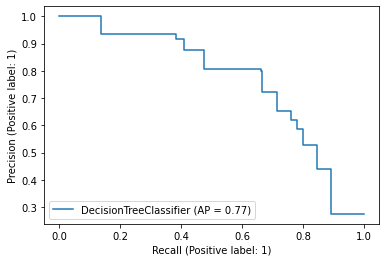

In [31]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(ac,x,y);

#### TECNICA PRO: Cómo crear un gráfico de umbrales

Igual que el anterior, aprenderemos a sacarle partido desde el punto de vista de negocio a este gráfico en lecciones futuras.

De momento simplemente aprende cómo se hace y recuérdalo para después.

Para este gráfico necesitamos un nuevo paquete que se llama yellowbrick.

Se instala con:

conda install -c conda-forge yellowbrick

Y para este gráfico lo cargamos con:

from yellowbrick.classifier import discrimination_threshold

https://www.scikit-yb.org/en/latest/api/classifier/threshold.html

Tenemos que pasarle:

* el modelo
* los predictores
* la target

Además le ponemos exclude = 'queue_rate' para eliminar otra línea que nos aporta mucha info.

La línea vertical que llama tr es valor que maximiza la F1.

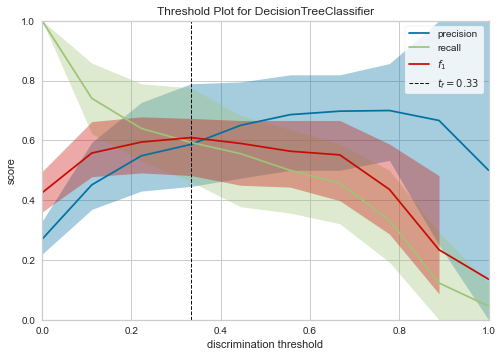

In [33]:
from yellowbrick.classifier import discrimination_threshold

discrimination_threshold(ac,x,y, exclude = 'queue_rate');